In [2]:
import warnings
warnings.filterwarnings('ignore')
import re

data manipulation


In [4]:
import pandas as pd
from pandarallel import pandarallel
import numpy as np
from datetime import datetime
import calendar

data visualization

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package omw-1.4 to /home/brandon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/brandon/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


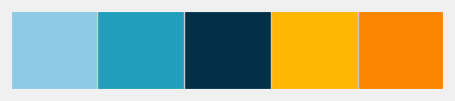

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from wordcloud import WordCloud,  ImageColorGenerator
# file, serialization and deserialization
import os
import missingno as mso
# NLP
# NLP preprocessing
from bs4 import BeautifulSoup
pandarallel.initialize(progress_bar=True)
import string
string.punctuation
import nltk
# Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from yellowbrick.text import FreqDistVisualizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import set_config
# LR
from sklearn.linear_model import LogisticRegression
# Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,roc_auc_score
# encoder
from sklearn.feature_extraction.text import CountVectorizer
# prepare styles and colors for plots
style.use("fivethirtyeight")
colors = ["#8ecae6", "#219ebc", "#023047", "#ffb703", "#fb8500"]
palette = sns.color_palette(colors)
sns.palplot(sns.color_palette(colors))
plt.show()
style.use("fivethirtyeight")


